### PT Parameters setting

In [2]:
# figures parameters
import matplotlib as mpl
mpl.rcParams['figure.titlesize'] = 18
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['figure.subplot.wspace'] = 0.2
mpl.rcParams['figure.subplot.hspace']= 0.4

import matplotlib
import matplotlib.pyplot as plt
import numpy as np


import os
import string
from decimal import * 

There are 5 kinds of parameters to set in this PT:
1. $\alpha \rightarrow$ parameter for rotation move
2. $\delta \rightarrow$  parameter for single mass center move
3. $\delta_{B} \rightarrow$  parameter for changing particle distance in a dimer
4. $\delta_{AR} \rightarrow$  parameter for changing aspect ratio of the simulation box
5. $\delta_{A} \rightarrow$  parameter for changing angle between base vectors

Since there is a quite big number of temperatures it is useful to set this parameter for only 2 or 3 values and then find automatically the others via interpolation.

In the cell below you may set:
1. The lowest themperature (`ti`), the higher one (`tf`) and total number of different temperatures (`n`)
2. An optional mid temperaure (`tm`) if there's a value in which specific heat changes radically (let's say the beginning of phase transition) and its position in the set of temperatures (`m`)
3. The parameters explained above for each for each of the three temperatures chosen (`ti, tm, tf`)

In the final picture, a view of the parameters as function of temperature can be seen.
In the last cell it is possible to save the values in the right files (named as *nameofparameter*.dat)

In [3]:
n = 272
ns = np.arange((n))
m = 254

ti = 1e-9
tf = 2e-5

t = np.zeros(n)
t[0] = ti
for i in range(1, n):
    t[i] = ( tf/ti )**(1/(n-1)) * t[i-1]

tm = t[m-1]
print(tm)


alphai = 0.01499
alpham = 1.761
alphaf = 3.139

deltai = 0.00002500
deltam = 0.002518
deltaf = 0.003519

delta_bi = 7.499E-9
delta_bm = 0.00006075
delta_bf = 0.0001204

delta_ari = 0.000025
delta_arm = 0.0025
delta_arf = 0.0035

delta_ai = 0.000025
delta_am = 0.0035
delta_af = 0.0035



alpha = np.zeros(n)
alpha[0] = alphai
for i in range (1, m):
    alpha[i] = (alpham/alphai)**(1/(m-1)) * alpha[i-1]
for i in range(m, n):
    alpha[i] = (alphaf/alpha[m-1])**(1/(n-m)) * alpha[i-1]

delta = np.zeros(n)
delta[0] = deltai
for i in range (1, m):
    delta[i] = (deltam/deltai)**(1/(m-1)) * delta[i-1]
for i in range(m, n):
    delta[i] = (deltaf/delta[m-1])**(1/(n-m)) * delta[i-1]

delta_b = np.zeros(n)
delta_b[0] = delta_bi
for i in range (1, m):
    delta_b[i] = (delta_bm/delta_bi)**(1/(m-1)) * delta_b[i-1]
for i in range(m, n):
    delta_b[i] = (delta_bf/delta_b[m-1])**(1/(n-m)) * delta_b[i-1]


delta_ar = np.zeros(n)
delta_ar[0] = delta_ari
for i in range (1, m):
    delta_ar[i] = (delta_arm/delta_ari)**(1/(m-1)) * delta_ar[i-1]
for i in range(m, n):
    delta_ar[i] = (delta_arf/delta_ar[m-1])**(1/(n-m)) * delta_ar[i-1]


delta_a = np.zeros(n)
delta_a[0] = delta_ai
for i in range (1, m):
    delta_a[i] = (delta_am/delta_ai)**(1/(m-1)) * delta_a[i-1]
for i in range(m, n):
    delta_a[i] = (delta_af/delta_a[m-1])**(1/(n-m)) * delta_a[i-1]


1.0359832330154482e-05


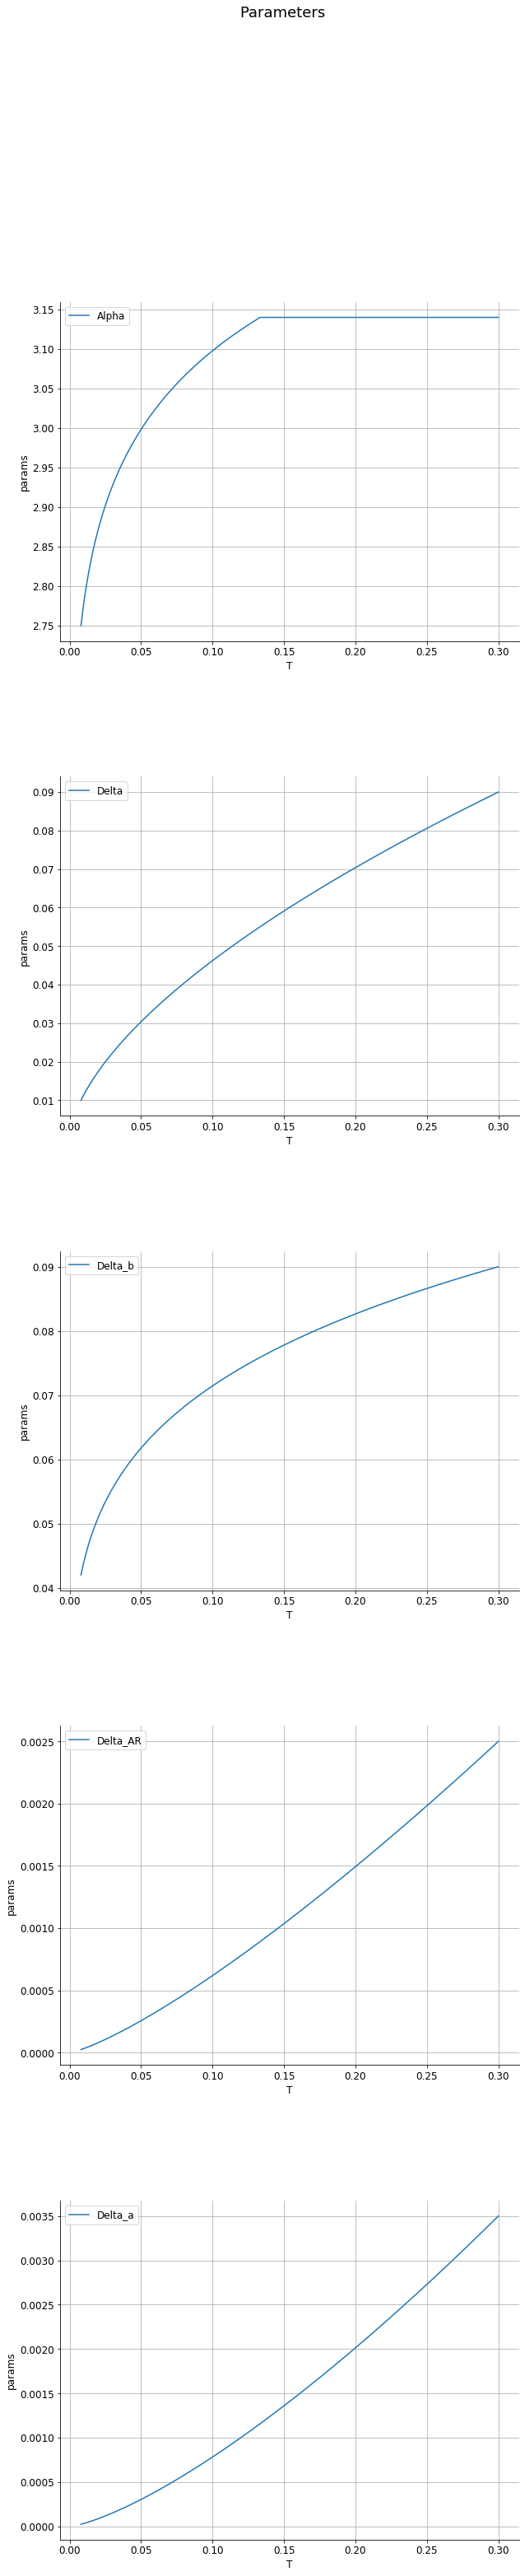

In [12]:
fig, axarr = plt.subplots (5 ,1, figsize=(10,50))
fig.suptitle("Parameters")

axarr[0].plot(t, alpha, label='Alpha')
axarr[1].plot(t, delta, label='Delta')
axarr[2].plot(t, delta_b, label='Delta_b')
axarr[3].plot(t, delta_ar, label='Delta_AR')
axarr[4].plot(t, delta_a, label='Delta_a')

for i in range(5):
    axarr[i].set_xlabel("T")
    axarr[i].set_ylabel("params")
    axarr[i].grid(True)
    axarr[i].legend()
plt.show()

In [5]:
c = Context(prec = 6, rounding = ROUND_DOWN)
setcontext(c)


f= open('Delta.dat',"w+")
for i in range (n):
    line = str(Decimal(delta[i])+Decimal(0)) + "\n"
    f.write(line)
f.close()

f= open('Alpha.dat',"w+")
for i in range (n):
    line = str(Decimal(alpha[i])+Decimal(0)) + "\n"
    f.write(line)
f.close()

f= open('Delta_b.dat',"w+")
for i in range (n):
    line = str(Decimal(delta_b[i])+Decimal(0)) + "\n"
    f.write(line)
f.close()

f= open('Delta_AR.dat',"w+")
for i in range (delta_ar.size):
    line = str(Decimal(delta_ar[i])+Decimal(0)) + "\n"
    f.write(line)
f.close()

f= open('Delta_a.dat',"w+")
for i in range (delta_a.size):
    line = str(Decimal(delta_a[i])+Decimal(0)) + "\n"
    f.write(line)
f.close()

### High Temperatures

In [6]:
n = 68
ns = np.arange((n))
m = 68

ti = 0.008
tf = 0.3

t = np.zeros(n)
t[0] = ti
for i in range(1, n):
    t[i] = ( tf/ti )**(1/(n-1)) * t[i-1]

tm = t[m-1]
print(tm)


alphai = 2.75
alpham = 3.14
alphaf = 3.14

deltai = 0.01
deltam = 0.09
deltaf = 0.09

delta_bi = 0.042
delta_bm = 0.09
delta_bf = 0.09

delta_ari = 0.000025
delta_arm = 0.0025
delta_arf = 0.0035

delta_ai = 0.000025
delta_am = 0.0035
delta_af = 0.0035



alpha = np.zeros(n)
alpha[0] = alphai
m = 53
for i in range (1, m):
    alpha[i] = (alpham/alphai)**(1/(m-1)) * alpha[i-1]
for i in range(m, n):
    alpha[i] = (alphaf/alpha[m-1])**(1/(n-m)) * alpha[i-1]

m=68
delta = np.zeros(n)
delta[0] = deltai
for i in range (1, m):
    delta[i] = (deltam/deltai)**(1/(m-1)) * delta[i-1]
for i in range(m, n):
    delta[i] = (deltaf/delta[m-1])**(1/(n-m)) * delta[i-1]

delta_b = np.zeros(n)
delta_b[0] = delta_bi
for i in range (1, m):
    delta_b[i] = (delta_bm/delta_bi)**(1/(m-1)) * delta_b[i-1]
for i in range(m, n):
    delta_b[i] = (delta_bf/delta_b[m-1])**(1/(n-m)) * delta_b[i-1]


delta_ar = np.zeros(n)
delta_ar[0] = delta_ari
for i in range (1, m):
    delta_ar[i] = (delta_arm/delta_ari)**(1/(m-1)) * delta_ar[i-1]
for i in range(m, n):
    delta_ar[i] = (delta_arf/delta_ar[m-1])**(1/(n-m)) * delta_ar[i-1]


delta_a = np.zeros(n)
delta_a[0] = delta_ai
for i in range (1, m):
    delta_a[i] = (delta_am/delta_ai)**(1/(m-1)) * delta_a[i-1]
for i in range(m, n):
    delta_a[i] = (delta_af/delta_a[m-1])**(1/(n-m)) * delta_a[i-1]


0.30000000000000093


In [7]:
c = Context(prec = 6, rounding = ROUND_DOWN)
setcontext(c)
path = "High_T"

f= open(path + '/Temperature.dat',"w+")
for i in range (n):
    line = str(Decimal(t[i])+Decimal(0)) + "\n"
    f.write(line)
f.close()

f= open(path + '/Delta.dat',"w+")
for i in range (n):
    line = str(Decimal(delta[i])+Decimal(0)) + "\n"
    f.write(line)
f.close()

f= open(path + '/Alpha.dat',"w+")
for i in range (n):
    line = str(Decimal(alpha[i])+Decimal(0)) + "\n"
    f.write(line)
f.close()

f= open(path + '/Delta_b.dat',"w+")
for i in range (n):
    line = str(Decimal(delta_b[i])+Decimal(0)) + "\n"
    f.write(line)
f.close()

f= open(path + '/Delta_AR.dat',"w+")
for i in range (delta_ar.size):
    line = str(Decimal(delta_ar[i])+Decimal(0)) + "\n"
    f.write(line)
f.close()

f= open(path + '/Delta_a.dat',"w+")
for i in range (delta_a.size):
    line = str(Decimal(delta_a[i])+Decimal(0)) + "\n"
    f.write(line)
f.close()